In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge

In [217]:
data_train = pd.read_csv("data/train.csv")
data_test = pd.read_csv("data/test.csv")

<Axes: xlabel='Survived', ylabel='count'>

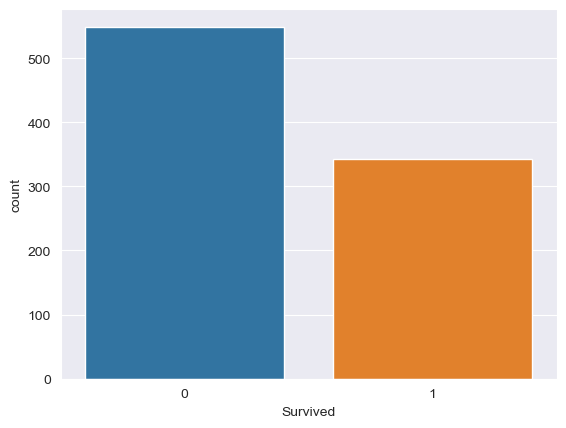

In [218]:
sns.countplot(data=data_train, x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

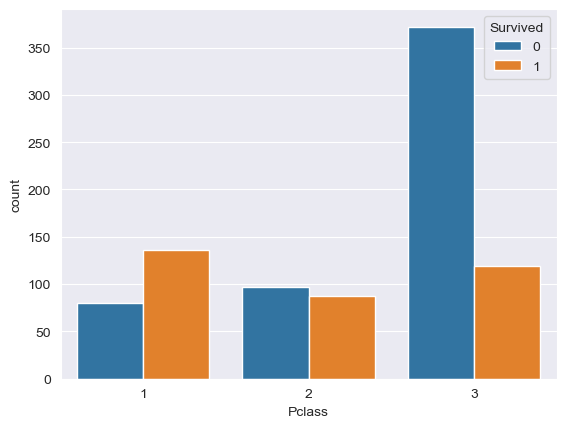

In [219]:
sns.countplot(data=data_train, x='Pclass', hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

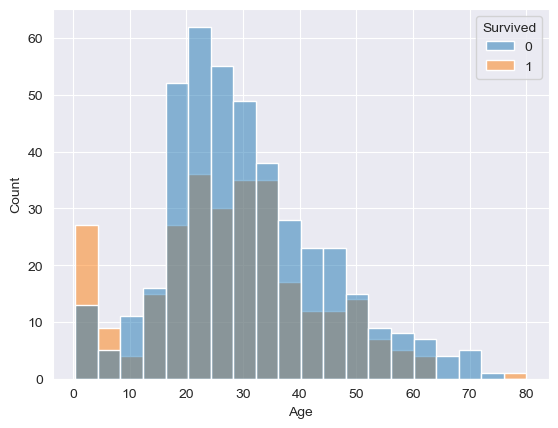

In [220]:
sns.histplot(data=data_train, x='Age', hue='Survived')

In [221]:
data_train['AgeGroup'] = np.nan
data_train.loc[data_train['Age'] < 10, 'AgeGroup'] = 'young'
data_train.loc[data_train['Age'] >= 10, 'AgeGroup'] = 'old'

data_test['AgeGroup'] = np.nan
data_test.loc[data_train['Age'] < 10, 'AgeGroup'] = 'young'
data_test.loc[data_train['Age'] >= 10, 'AgeGroup'] = 'old'

<Axes: xlabel='AgeGroup', ylabel='count'>

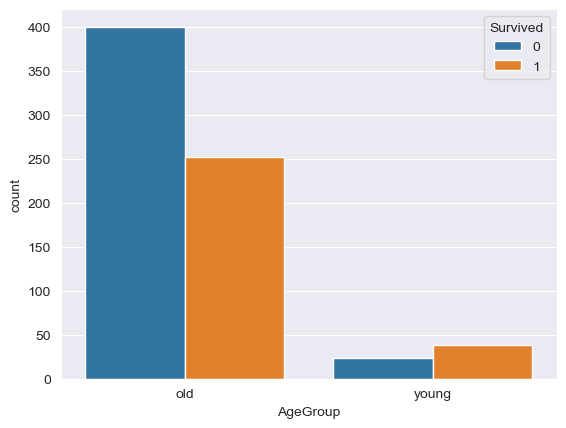

In [222]:
sns.countplot(data=data_train, x='AgeGroup', hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

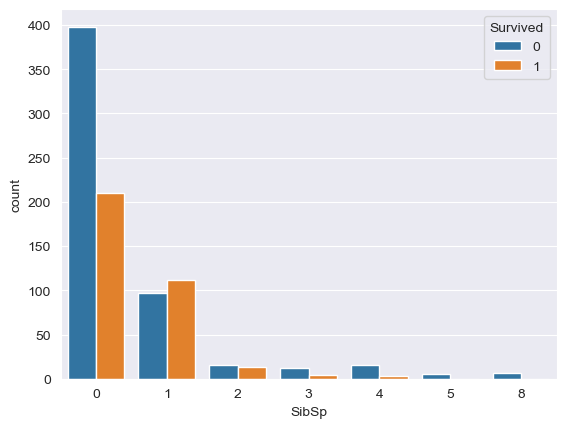

In [223]:
sns.countplot(data=data_train, x='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

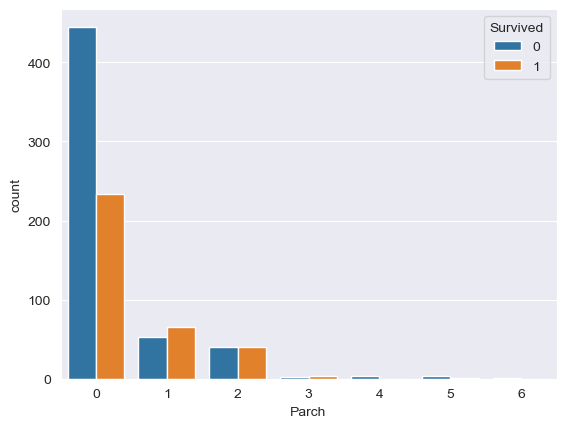

In [224]:
sns.countplot(data=data_train, x='Parch', hue='Survived')

In [225]:
data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch']
data_test['FamilySize'] = data_test['SibSp'] + data_test['Parch']

<Axes: xlabel='FamilySize', ylabel='count'>

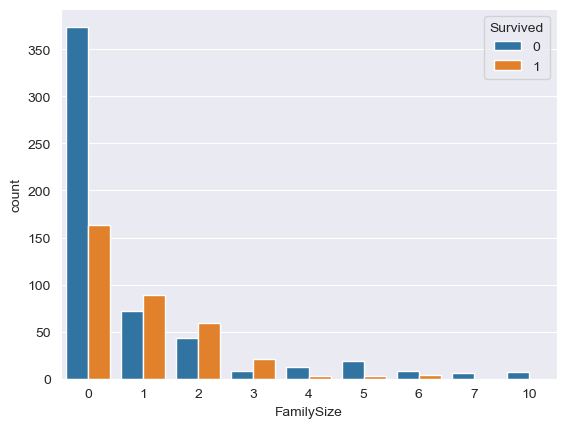

In [226]:
sns.countplot(data=data_train, x='FamilySize', hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

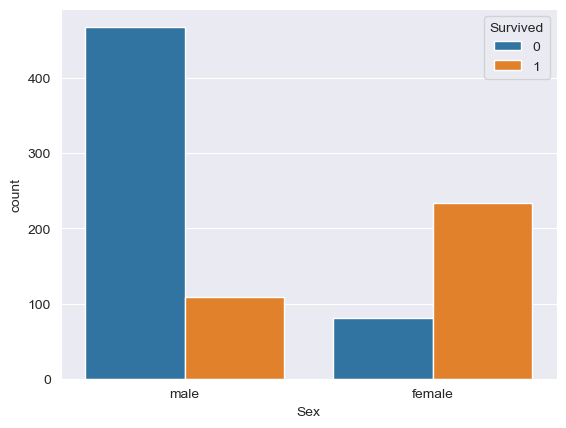

In [227]:
sns.countplot(data=data_train, x='Sex', hue='Survived')

(0.0, 100.0)

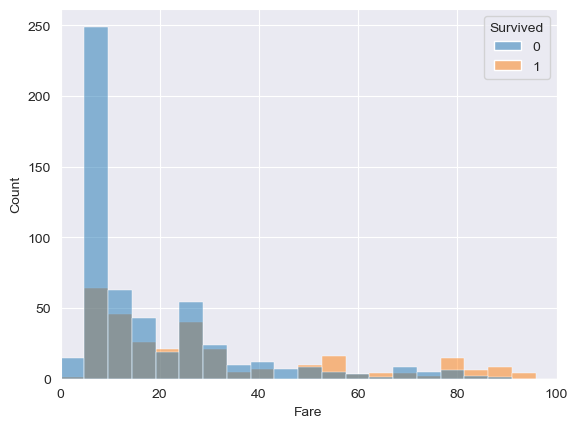

In [228]:
sns.histplot(data=data_train, x='Fare', hue='Survived')
plt.xlim([0, 100])

In [229]:
data_train['Price'] = np.nan
data_train.loc[data_train['Fare'] < 50, 'Price'] = 'low'
data_train.loc[data_train['Fare'] >= 50, 'Price'] = 'high'

data_test['Price'] = np.nan
data_test.loc[data_train['Fare'] < 50, 'Price'] = 'low'
data_test.loc[data_train['Fare'] >= 50, 'Price'] = 'high'

<Axes: xlabel='Price', ylabel='count'>

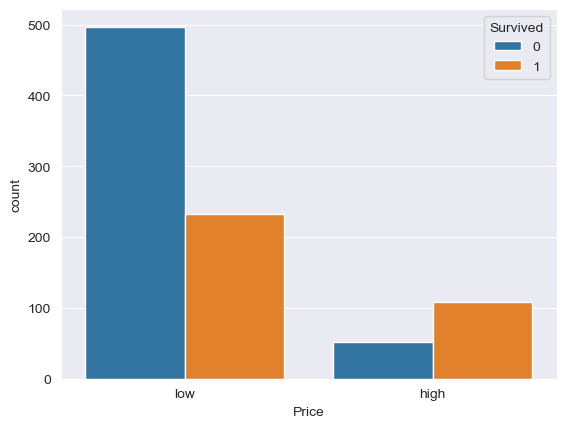

In [230]:
sns.countplot(data=data_train, x='Price', hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

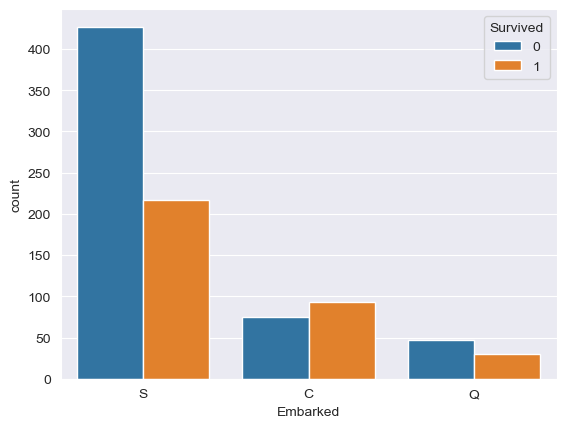

In [231]:
sns.countplot(data=data_train, x='Embarked', hue='Survived')

In [232]:
y = data_train['Survived'].copy()

In [233]:
data_train['CabinClass'] = data_train['Cabin'].str[0]
data_test['CabinClass'] = data_test['Cabin'].str[0]

<Axes: xlabel='CabinClass', ylabel='count'>

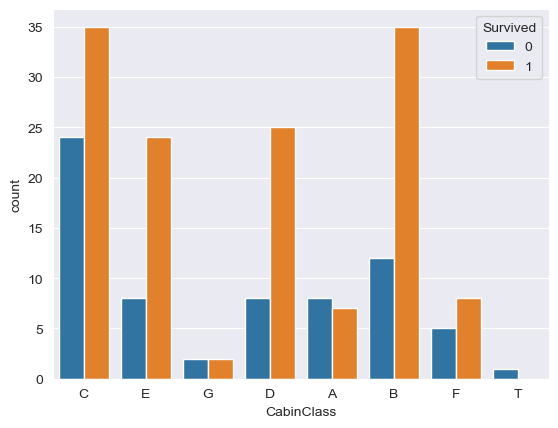

In [234]:
sns.countplot(data=data_train, x='CabinClass', hue='Survived')

In [235]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Price,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,old,1,low,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old,1,high,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,old,0,low,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old,1,high,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old,0,low,NaN


In [236]:
y = data_train['Survived'].copy().astype(int)
data_train.drop('Survived', axis=1, inplace=True)
data = pd.concat([data_train, data_test], axis=0).reset_index(drop=True)

In [237]:
data['TicketClass'] = data['Ticket'].str.split()

In [238]:
data['TicketClass']

0                [A/5, 21171]
1                 [PC, 17599]
2         [STON/O2., 3101282]
3                    [113803]
4                    [373450]
                ...          
1304             [A.5., 3236]
1305              [PC, 17758]
1306    [SOTON/O.Q., 3101262]
1307                 [359309]
1308                   [2668]
Name: TicketClass, Length: 1309, dtype: object

In [239]:
data.corr()

C:\Users\Cata\AppData\Local\Temp\ipykernel_15600\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.031437
Pclass,-0.038354,1.000000,-0.408106,0.060832,0.018322,-0.558629,0.050027
Age,0.028814,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.240229
SibSp,-0.055224,0.060832,-0.243699,1.000000,0.373587,0.160238,0.861952
Parch,0.008942,0.018322,-0.150917,0.373587,1.000000,0.221539,0.792296
Fare,0.031428,-0.558629,0.178740,0.160238,0.221539,1.000000,0.226492
FamilySize,-0.031437,0.050027,-0.240229,0.861952,0.792296,0.226492,1.000000


In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  AgeGroup     1049 non-null   object 
 12  FamilySize   1309 non-null   int64  
 13  Price        1309 non-null   object 
 14  CabinClass   295 non-null    object 
 15  TicketClass  1309 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage: 163.8+ KB


In [241]:
age_median = data.groupby(['Pclass', 'FamilySize'])['Age'].median()

In [242]:
data['Age'] = data.apply(lambda x: age_median.loc[(x['Pclass'], x['FamilySize'])] if np.isnan(x['Age']) else x['Age'], axis=1)

In [243]:
data.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
AgeGroup        260
FamilySize        0
Price             0
CabinClass     1014
TicketClass       0
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

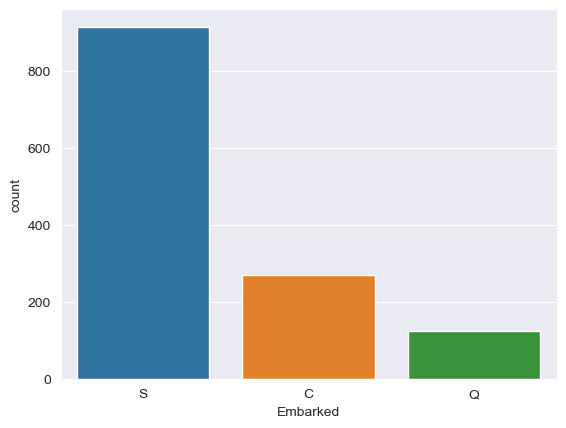

In [244]:
sns.countplot(data=data, x=data['Embarked'])

In [245]:
data.loc[(data['Embarked'].isna()), 'Embarked'] = 'S'

In [246]:
data.groupby(['Pclass', 'Embarked', 'Sex', 'FamilySize'])['Fare'].median().unstack().fillna(0)

FamilySize                    0         1         2         3          4   \
Pclass Embarked Sex                                                         
1      C        female  81.17915  78.26670   97.0208    0.0000  262.37500   
                male    30.69580  73.26665  113.2750    0.0000  262.37500   
       Q        female   0.00000  90.00000    0.0000    0.0000    0.00000   
                male     0.00000   0.00000   90.0000    0.0000    0.00000   
       S        female  86.50000  60.00000   71.0000  120.0000    0.00000   
                male    26.55000  60.00000   81.8583  135.7750    0.00000   
2      C        female  12.89585  24.00000   37.0042   41.5792    0.00000   
                male    15.03330  27.72080   37.0042   41.5792    0.00000   
       Q        female  12.35000   0.00000    0.0000    0.0000    0.00000   
                male    12.35000   0.00000    0.0000    0.0000    0.00000   
       S        female  13.00000  26.00000   26.2500   33.3750   23.00000   
                male    13.00000  26.00000   29.0000   33.3750    0.00000   
3      C        female   7.22920  14.45420   15.2458   19.2583    0.00000   
                male     7.22920  14.45420   15.2458    0.0000    0.00000   
       Q        female   7.75000  15.50000   19.3750    0.0000    0.00000   
                male     7.75000  15.50000   19.3750    0.0000    0.00000   
       S        female   7.98750  14.00415   16.7000   20.5750   25.46670   
                male     7.89580  13.90000   14.5000   20.5750   23.74585   

FamilySize                    5        6     7      10  
Pclass Embarked Sex                                     
1      C        female    0.0000   0.0000   0.0   0.00  
                male      0.0000   0.0000   0.0   0.00  
       Q        female    0.0000   0.0000   0.0   0.00  
                male      0.0000   0.0000   0.0   0.00  
       S        female  263.0000   0.0000   0.0   0.00  
                male    263.0000   0.0000   0.0   0.00  
2      C        female    0.0000   0.0000   0.0   0.00  
                male      0.0000   0.0000   0.0   0.00  
       Q        female    0.0000   0.0000   0.0   0.00  
                male      0.0000   0.0000   0.0   0.00  
       S        female   18.7500   0.0000   0.0   0.00  
                male      0.0000   0.0000   0.0   0.00  
3      C        female    0.0000   0.0000   0.0   0.00  
                male      0.0000   0.0000   0.0   0.00  
       Q        female   29.1250   0.0000   0.0   0.00  
                male     29.1250   0.0000   0.0   0.00  
       S        female   27.9000  31.2750  46.9  69.55  
                male     39.6875  31.3875  46.9  69.55

In [247]:
data.loc[data['Fare'].isna(), ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Price,CabinClass,TicketClass
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,old,0,low,NaN,[3701]


In [248]:
data.loc[data['Fare'].isna(), 'Fare'] = 7.89580

In [249]:
data.loc[data['CabinClass'].isna(), 'CabinClass'] = 'NA'

In [250]:
data.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
AgeGroup        260
FamilySize        0
Price             0
CabinClass        0
TicketClass       0
dtype: int64

In [251]:
data['GroupSize'] = data['Ticket'].apply(lambda x:data['Ticket'].str.split().str[-1].value_counts().to_dict()[x.split()[-1]])

In [252]:
X = data[data['PassengerId'].isin(data_train['PassengerId'].values)].copy()
X_test = data[data['PassengerId'].isin(data_test['PassengerId'].values)].copy()

In [253]:
cat = ['PassengerId','Name', 'FamilySize', 'Ticket', 'Cabin', 'AgeGroup', 'TicketClass', 'Price']
X.drop(cat, axis=1, inplace=True)
X_test.drop(cat, axis=1, inplace=True)

In [254]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinClass,GroupSize
0,3,male,22.0,1,0,7.2500,S,NA,1
1,1,female,38.0,1,0,71.2833,C,C,2
2,3,female,26.0,0,0,7.9250,S,NA,1
3,1,female,35.0,1,0,53.1000,S,C,2
4,3,male,35.0,0,0,8.0500,S,NA,1
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,NA,1
887,1,female,19.0,0,0,30.0000,S,B,1
888,3,female,14.5,1,2,23.4500,S,NA,4
889,1,male,26.0,0,0,30.0000,C,C,1


In [255]:
numerical_cols = ['Age', 'Fare']
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'CabinClass', 'Parch', 'GroupSize']
num_trasnf = Pipeline(steps=[('scaler', StandardScaler())])
cat_tranf = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))])
ct = ColumnTransformer(
    transformers=[
        ('num', num_trasnf, numerical_cols),
        ('cat', cat_tranf, categorical_cols)],
    remainder='passthrough')

X = ct.fit_transform(X)
X_test = ct.transform(X_test)

print(X.shape)

(891, 41)


D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [256]:
KNN_grid = {'n_neighbors': [3, 5, 7, 9, 17, 25, 55, 105], 'p': [1, 2]}

kNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=KNN_grid, verbose=0, n_jobs=-1)
kNN.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 17, 25, 55, 105],
                         'p': [1, 2]})

In [257]:
cross_val_score(kNN.best_estimator_, X, y, cv=5).mean()

0.7879103634423451

In [258]:
SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf', 'poly'],
            'degree': [2,3],
            'gamma': ['scale', 'auto', 0.1, 0.2, 0.01, 0.02, 0.001, 0.005]}

svm = GridSearchCV(estimator=SVC(), param_grid=SVC_grid, verbose=0, n_jobs=-1)
svm.fit(X, y)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5], 'degree': [2, 3],
                         'gamma': ['scale', 'auto', 0.1, 0.2, 0.01, 0.02, 0.001,
                                   0.005],
                         'kernel': ['linear', 'rbf', 'poly']})

In [259]:
cross_val_score(svm.best_estimator_, X, y, cv=5).mean()

0.8316552633230808

In [260]:
rand_forest_grid = {'n_estimators':[50, 100, 150, 200, 300, 400, 500], 'max_depth': [20, 40, 50, 100, 120, 150], 'max_features' : ['auto', 'sqrt', 'log2']}
rand_for = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rand_forest_grid, verbose=0, n_jobs=-1)
rand_for.fit(X, y)

D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 50, 100, 120, 150],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300, 400, 500]})

In [261]:
cross_val_score(rand_for.best_estimator_, X, y, cv=5).mean()

D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesC

0.7912811499591991

In [262]:
log_reg_grid = {'penalty':['l1', 'l2', 'elasticnet', None], 'C':[0.2, 0.5, 1, 5, 7, 10, 15, 20]}
log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=log_reg_grid, verbose=0, n_jobs=-1)
log_reg.fit(X, y)

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pe

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.5, 1, 5, 7, 10, 15, 20],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [266]:
log_reg.best_estimator_

LogisticRegression(C=0.5)

In [263]:
cross_val_score(log_reg.best_estimator_, X, y, cv=5).mean()

0.8182035026049841

In [264]:
def submit(model):
    predicted = model.predict(X_test)
    data_test2 = pd.read_csv("data/test.csv")
    output = pd.DataFrame({"PassengerId" : data_test2["PassengerId"], "Survived":predicted})
    output.to_csv('submisie.csv', index=False)

In [265]:
submit(svm)